In [1]:
# Prepare workspace
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
    
# fix seed for repeatability
np.random.seed(1)

In [2]:
# Arguments
class Args():
    pass
args = Args()

args.input_actions = 'data/mars_tianchi_user_actions.csv'
args.input_songs = 'data/mars_tianchi_songs.csv'

In [3]:
# Load actions
actions = pd.read_csv(args.input_actions,
                      names=['user_id', 'song_id', 'gmt_create', 'action_type', 'Ds'],)

In [4]:
# Load song information
song_info = pd.read_csv(args.input_songs,
                        names=['song_id', 'artist_id', 'publish_time', 'song_init_plays', 'lang', 'gender'],
                        header=None, parse_dates=[2])

In [5]:
# Build conversion map
gmt_create = np.sort(actions.gmt_create.unique())
T = gmt_create.shape[0]
gmt_create_to_idx = {gmt_create[i] : i for i in xrange(T)}

gmt_create_to_format = {gmt : '2015' + time.strftime("%m%d%H", time.localtime(gmt)) for gmt in gmt_create}

song_id_unique = song_info.song_id.unique()
song_id_to_idx = {song_id_unique[i] : i for i in xrange(song_id_unique.shape[0])}

In [6]:
# Add time reference
today = datetime(2015, 3, 1, 0, 0, 0)
dates = [today + timedelta(hours=i) for i in range(4392)]

In [7]:
def display_user_action(user_id):
    global actions, song_id_to_idx
    global gmt_create_to_idx, gmt_create_to_format, dates
    
    acts = actions[actions.user_id == user_id]

    x1, x2, x3 = [], [], []
    y1, y2, y3 = [], [], []
    x1f, x2f, x3f = [], [], []
    
    # Find Download, Play and Collect operations
    acts1 = acts[acts.action_type == 1]
    acts2 = acts[acts.action_type == 2]
    acts3 = acts[acts.action_type == 3]

    for row in acts1.iterrows():
        x1.append(gmt_create_to_idx[row[1]['gmt_create']])
        x1f.append(gmt_create_to_format[row[1]['gmt_create']])
        y1.append(song_id_to_idx[row[1]['song_id']])
    for row in acts2.iterrows():
        x2.append(gmt_create_to_idx[row[1]['gmt_create']])
        x2f.append(gmt_create_to_format[row[1]['gmt_create']])
        y2.append(song_id_to_idx[row[1]['song_id']])
    for row in acts3.iterrows():
        x3.append(gmt_create_to_idx[row[1]['gmt_create']])
        x3f.append(gmt_create_to_format[row[1]['gmt_create']])
        y3.append(song_id_to_idx[row[1]['song_id']])
    
    for i in range(len(x1f)):
        x1f[i] = datetime.strptime(x1f[i], "%Y%m%d%H")
    for i in range(len(x2f)):
        x2f[i] = datetime.strptime(x2f[i], "%Y%m%d%H")
    for i in range(len(x3f)):
        x3f[i] = datetime.strptime(x3f[i], "%Y%m%d%H")
        
    plt.figure()
    plt.title(user_id)
    plt.plot(x1f, y1, 'ro')
    plt.plot(x2f, y2, 'bs')
    plt.plot(x3f, y3, 'g^')
    plt.axis([dates[0], dates[-1], 0, len(song_id_to_idx.items())])
    plt.gcf().autofmt_xdate(rotation = 90)
    plt.show()

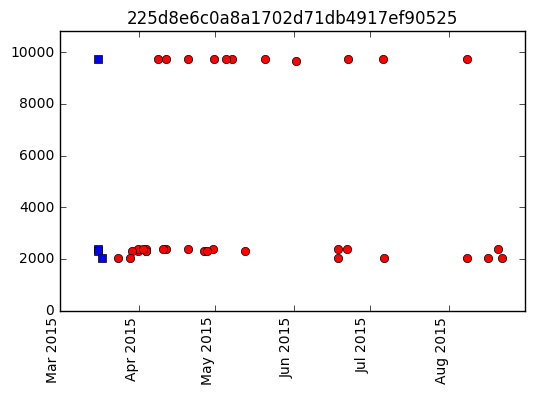

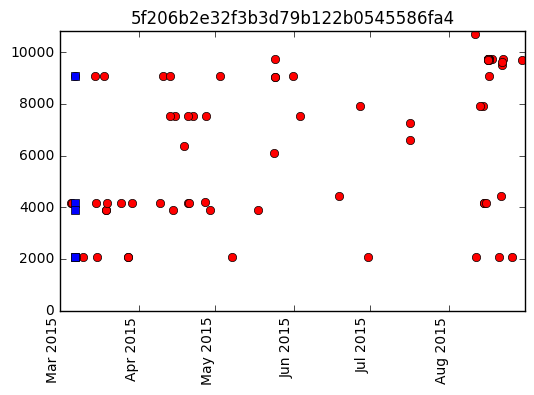

In [8]:
user_ids = actions.user_id.unique()

# Select the range of users to display
user_range = range(240, 242)
for i in user_range:
    display_user_action(user_ids[i])